In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
salaries_data2 = pd.read_csv('C:/Users/usuario/Desktop/SALARY_COMPETITION/data/salaries_data.csv')


In [4]:
salaries_data2 = salaries_data2.drop(['salary', 'salary_currency'], axis=1)

In [6]:
unique_values = salaries_data2['employment_type'].nunique()

# Imprimir número de valores únicos
print("Hay {} valores únicos en la columna 'employment_type'".format(unique_values))

Hay 4 valores únicos en la columna 'employment_type'


In [7]:
counts = salaries_data2['employment_type'].value_counts()

# Imprimir conteo de ocurrencias
print(counts)

FT    484
PT      8
CT      4
FL      4
Name: employment_type, dtype: int64


In [ ]:
#Podemos eliminar esa columna ya que el 98% de los datos son de un solo valor único

In [8]:
salaries_data2 = salaries_data2.drop(['employment_type'], axis=1)

In [9]:
"""En este modelo voy a eliminar la columna work_year ya que está muy relacionada con experience_level y me quedo con esta última"""

'En este modelo voy a eliminar la columna work_year ya que está muy relacionada con experience_level y me quedo con esta última'

In [10]:
salaries_data2 = salaries_data2.drop(['work_year'], axis=1)

In [11]:
salaries_data2.head()

,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,Data Engineer,140250,US,100,US,M
1,SE,Data Engineer,135000,US,100,US,M
2,MI,BI Data Analyst,100000,US,100,US,M
3,MI,ML Engineer,270000,US,100,US,L
4,MI,Data Engineer,26005,RO,0,US,L


In [12]:
"""Quiero cambiar la columna Experience level pero esta vez asignadole un valor a cada variable, siendo EN=1, EX=2, MI=3 y SE=4"""

'Quiero cambiar la columna Experience level pero esta vez asignadole un valor a cada variable, siendo EN=1, EX=2, MI=3 y SE=4'

In [14]:

replace_dict = {'EN': 1, 'EX': 2, 'MI': 3, 'SE': 4}

# Reemplazar valores en la columna 'experience_level'
salaries_data2['experience_level'] = salaries_data2['experience_level'].replace(replace_dict)

# Imprimir los datos para verificar el reemplazo
salaries_data2.head()

,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,4,Data Engineer,140250,US,100,US,M
1,4,Data Engineer,135000,US,100,US,M
2,3,BI Data Analyst,100000,US,100,US,M
3,3,ML Engineer,270000,US,100,US,L
4,3,Data Engineer,26005,RO,0,US,L


In [ ]:
"""podemos hacer lo mismo para la columna company_size"""

In [23]:
replace_dict2 = {'L': 1, 'M': 2, 'S': 3}

# Reemplazar valores en la columna 'experience_level'
salaries_data2['company_size'] = salaries_data2['company_size'].replace(replace_dict2)

# Imprimir los datos para verificar el reemplazo
salaries_data2.head(20)

,experience_level,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,4,140250,US,100,US,2
1,4,135000,US,100,US,2
2,3,100000,US,100,US,2
3,3,270000,US,100,US,1
4,3,26005,RO,0,US,1
5,3,153000,US,50,US,2
6,1,51321,FR,0,FR,3
7,1,49646,FR,50,FR,2
8,3,76940,GR,100,GR,2
9,1,59102,FR,50,FR,2


In [17]:
"""Según nos damos cuenta parece que hay una relación entre la residencia del empleado según su salrio sin importar el Job_title que tenga. 
por lo cual, podemos eliminar la columna job_title y la employee_residence pasarla a numérica mediante get.dummies"""

'Según nos damos cuenta parece que hay una relación entre la residencia del empleado según su salrio sin importar el Job_title que tenga. \npor lo cual, podemos eliminar la columna job_title y la employee_residence pasarla a numérica mediante get.dummies'

In [18]:
salaries_data2 = salaries_data2.drop(['job_title'], axis=1)

In [20]:
counts2 = salaries_data2['remote_ratio'].value_counts()

# Imprimir conteo de ocurrencias
print(counts2)

100    320
0      102
50      78
Name: remote_ratio, dtype: int64


In [21]:
"""De momento la columna remote_ratio no me dice nada. """

'De momento la columna remote_ratio no me dice nada. '

In [22]:
counts3 = salaries_data2['employee_residence'].value_counts()

# Imprimir conteo de ocurrencias
print(counts3)

US    278
GB     38
IN     25
CA     24
DE     19
FR     14
ES     13
GR     11
PK      6
PT      6
BR      5
NL      4
JP      4
VN      3
PL      3
AT      3
TR      3
AE      3
RO      2
BE      2
NG      2
AU      2
RU      2
IT      2
SI      2
MY      1
BO      1
HN      1
IE      1
MT      1
HU      1
RS      1
MD      1
IR      1
LU      1
DZ      1
MX      1
PR      1
CZ      1
EE      1
HK      1
BG      1
UA      1
NZ      1
JE      1
CL      1
CH      1
KE      1
SG      1
Name: employee_residence, dtype: int64


In [25]:
"""Por lo que se ve, tiene más relevancia al columna employee_residence que la location_company a la hora de predercir los salarios
por lo que podemos prescindir de la columna company_location"""

'Por lo que se ve, tiene más relevancia al columna employee_residence que la location_company a la hora de predercir los salarios\npor lo que podemos prescindir de la columna location_company'

In [26]:
salaries_data2 = salaries_data2.drop(['company_location'], axis=1)

In [27]:
"""Voy a crear un gráfico para ver la importancia de la columna employee_residence con el salario"""

'Voy a crear un gráfico para ver la importancia de la columna employee_residence con el salario'

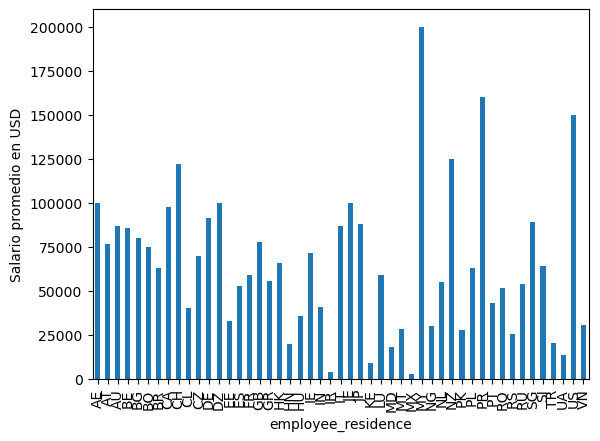

In [28]:
salaries_data2.groupby('employee_residence')['salary_in_usd'].mean().plot(kind='bar')
plt.ylabel('Salario promedio en USD')
plt.show()

In [29]:
"""se observa que si tiene que ver la localización del empleado para el salario. por lo que puedo convertir esa columna en numérica"""

'se observa que si tiene que ver la localización del empleado para el salario. por lo que puedo convertir esa columna en numérica'

In [30]:
# Convertir la columna 'employee_residence' a valores numéricos
salaries_data2['employee_residence'], categories = pd.factorize(salaries_data2['employee_residence'])

# Imprimir las categorías originales y los valores numéricos asignados
print(categories)
print(salaries_data2['employee_residence'].unique())

Index(['US', 'RO', 'FR', 'GR', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP', 'CA',
       'PT', 'IE', 'AE', 'IT', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH', 'CL', 'JE',
       'TR', 'NZ', 'UA', 'AU', 'NG', 'BG', 'HK', 'EE', 'CZ', 'RU', 'PR', 'AT',
       'BR', 'DZ', 'IR', 'NL', 'RS', 'HU', 'PL', 'HN', 'MY', 'BO', 'MT', 'LU',
       'SG'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [31]:
salaries_data2.head()

,experience_level,salary_in_usd,employee_residence,remote_ratio,company_size
0,4,140250,0,100,2
1,4,135000,0,100,2
2,3,100000,0,100,2
3,3,270000,0,100,1
4,3,26005,1,0,1


In [32]:
"""Ahora ya tenemos las columnas que queremos numéricas. Pinto un gráfico para ver sus correlaciones que 
en teoría deberían ser altas."""

'Ahora ya tenemos las columnas que queremos numéricas. Pinto un gráfico para ver sus correlaciones que \nen teoría deberían ser altas.'

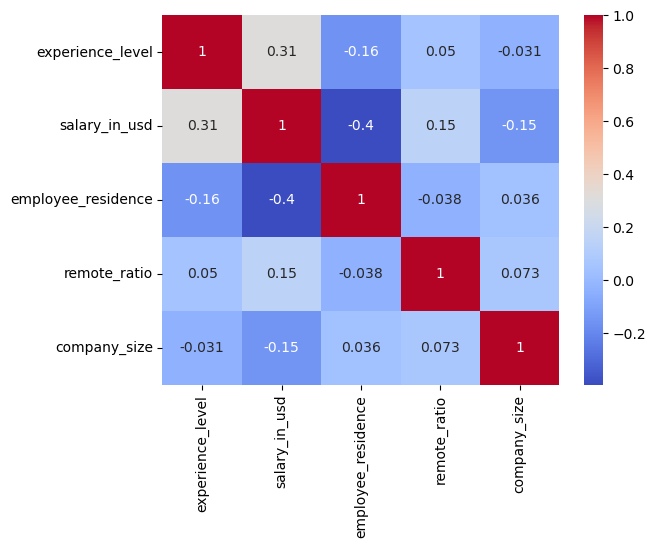

In [33]:
corr_matrix = salaries_data2.corr()

# Crear mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


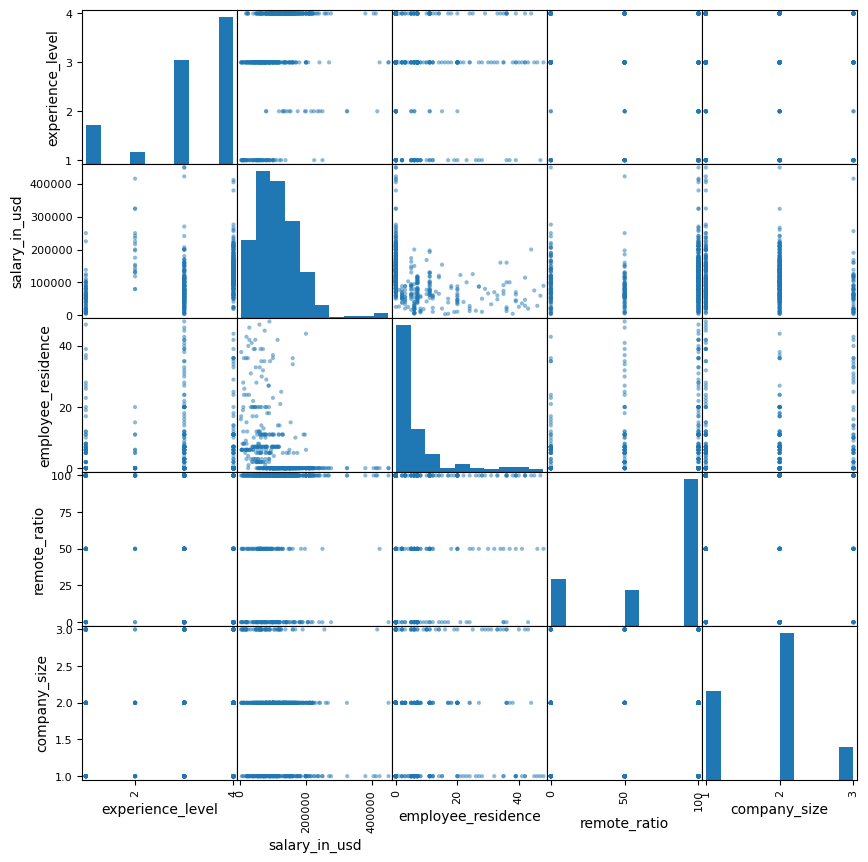

In [55]:
pd.plotting.scatter_matrix(salaries_data2, figsize=(10,10))
plt.show()

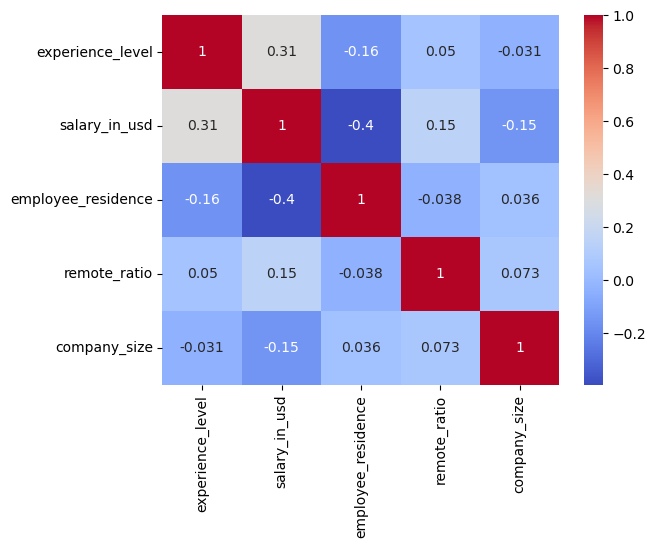

In [56]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
num_cols = ['experience_level', 'employee_residence','remote_ratio','company_size']
X = salaries_data2[num_cols]
y = salaries_data2['salary_in_usd']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de bosques aleatorios y ajustar parámetros
rf_model = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en conjunto de prueba y evaluar rendimiento
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R^2:', r2)


MSE: 2609520704.6810875
R^2: 0.33308348386033726


In [35]:
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 51083.46801736436


In [38]:
"""A priori, parece que este modelo debería funcionar mejor.
Ahora vamos con el test"""

'A priori, parece que este modelo debería funcionar mejor.\nAhora vamos con el test'

In [36]:
testeo_data2 = pd.read_csv('C:/Users/usuario/Desktop/SALARY_COMPETITION/data/testeo.csv')

In [39]:
testeo_data2 = testeo_data2.drop(['employment_type'], axis=1)

In [40]:
testeo_data2 = testeo_data2.drop(['work_year'], axis=1)

In [41]:
replace_dicttest = {'EN': 1, 'EX': 2, 'MI': 3, 'SE': 4}

# Reemplazar valores en la columna 'experience_level'
testeo_data2['experience_level'] = testeo_data2['experience_level'].replace(replace_dicttest)


In [42]:
replace_dicttest2 = {'L': 1, 'M': 2, 'S': 3}

# Reemplazar valores en la columna 'experience_level'
testeo_data2['company_size'] = testeo_data2['company_size'].replace(replace_dicttest2)

# Imprimir los datos para verificar el reemplazo
testeo_data2.head(20)

,experience_level,job_title,employee_residence,remote_ratio,company_location,company_size
0,4,Machine Learning Scientist,JP,0,JP,3
1,3,Lead Data Analyst,US,100,US,1
2,3,Data Analyst,US,100,US,1
3,3,Machine Learning Engineer,CN,0,CN,2
4,3,Product Data Analyst,IN,100,IN,1
5,4,Data Engineer,MX,0,MX,3
6,4,Data Scientist,GR,100,US,1
7,3,Data Analyst,FR,50,FR,1
8,3,Data Scientist,PH,100,US,3
9,4,Data Engineer,US,100,US,1


In [43]:
testeo_data2 = testeo_data2.drop(['job_title'], axis=1)

In [44]:
testeo_data2 = testeo_data2.drop(['company_location'], axis=1)

In [45]:
# Convertir la columna 'employee_residence' a valores numéricos
testeo_data2['employee_residence'], categories = pd.factorize(testeo_data2['employee_residence'])

# Imprimir las categorías originales y los valores numéricos asignados
print(categories)
print(testeo_data2['employee_residence'].unique())

Index(['JP', 'US', 'CN', 'IN', 'MX', 'GR', 'FR', 'PH', 'DK', 'ES', 'IT', 'HR',
       'DE', 'HU', 'GB', 'CA', 'IQ', 'SG', 'RU', 'CO', 'BR', 'NL', 'AR', 'TN',
       'PL', 'AU'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [46]:
num_cols3 = ['experience_level', 'employee_residence','remote_ratio','company_size']
X_test = testeo_data2[num_cols3]

# Cargar modelo entrenado
rf_model = RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_leaf=5, random_state=42)
rf_model.fit(X, y)

# Hacer predicciones en datos de prueba
y_pred = rf_model.predict(X_test)

# Agregar las predicciones como columna en los datos de prueba
testeo_data2['salary_in_usd'] = y_pred

In [47]:
testeo_data2.head()

,experience_level,employee_residence,remote_ratio,company_size,salary_in_usd
0,4,0,0,3,133861.438222
1,3,1,100,1,82605.172489
2,3,1,100,1,82605.172489
3,3,2,0,2,54552.925708
4,3,3,100,1,68017.804959


In [48]:
muestra2 = pd.read_csv('C:/Users/usuario/Desktop/SALARY_COMPETITION/data/muestra.csv')

In [49]:
muestra2['salary_in_usd'] = y_pred

In [51]:
muestra2.head()

,id,salary_in_usd
0,0,133861.438222
1,1,82605.172489
2,2,82605.172489
3,3,54552.925708
4,4,68017.804959


In [53]:
muestra2.to_csv(r'C:\Users\usuario\Desktop\SALARY_COMPETITION\data\muestra2.csv', index=False)

In [54]:
"""Modelo2. En este modelo hemos tomado como base las columnas: 'experience_level', 'employee_residence','remote_ratio','company_size'"""

"Modelo2. En este modelo hemos tomado como base las columnas: 'experience_level', 'employee_residence','remote_ratio','company_size'"